In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

## reading all data

In [3]:
df1  = pd.read_csv("Data/202101-divvy-tripdata.csv")
df2  = pd.read_csv("Data/202102-divvy-tripdata.csv")
df3  = pd.read_csv("Data/202103-divvy-tripdata.csv")
df4  = pd.read_csv("Data/202104-divvy-tripdata.csv")
df5  = pd.read_csv("Data/202105-divvy-tripdata.csv")
df6  = pd.read_csv("Data/202106-divvy-tripdata.csv")
df7  = pd.read_csv("Data/202107-divvy-tripdata.csv")
df8  = pd.read_csv("Data/202108-divvy-tripdata.csv")
df9  = pd.read_csv("Data/202109-divvy-tripdata.csv")
df10 = pd.read_csv("Data/202110-divvy-tripdata.csv")
df11 = pd.read_csv("Data/202111-divvy-tripdata.csv")
df12 = pd.read_csv("Data/202112-divvy-tripdata.csv")

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
all_data = pd.concat(frames)


## saving all data combined in one csv file

In [4]:
all_data.to_csv("Data/All_Combined.csv")

In [5]:
# shape of data
all_data.shape

(5595063, 13)

In [6]:
all_data.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01
std,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


### checking null data

In [9]:
# null data rows
all_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

### converting column to datetime 

In [37]:
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['started_at']

0        2021-01-23 16:14:19
1        2021-01-27 18:43:08
2        2021-01-21 22:35:54
3        2021-01-07 13:31:13
4        2021-01-23 02:24:02
                 ...        
247535   2021-12-12 13:36:55
247536   2021-12-06 19:37:50
247537   2021-12-02 08:57:04
247538   2021-12-13 09:00:26
247539   2021-12-13 08:45:32
Name: started_at, Length: 5595063, dtype: datetime64[ns]

In [38]:
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])
all_data['ended_at']

0        2021-01-23 16:24:44
1        2021-01-27 18:47:12
2        2021-01-21 22:37:14
3        2021-01-07 13:42:55
4        2021-01-23 02:24:45
                 ...        
247535   2021-12-12 13:56:08
247536   2021-12-06 19:44:51
247537   2021-12-02 09:05:21
247538   2021-12-13 09:14:39
247539   2021-12-13 08:49:09
Name: ended_at, Length: 5595063, dtype: datetime64[ns]

### calculating ride length by time difference in starting time of ride and ending time ( in minutes)

In [44]:
# ride calculation
all_data['ride_in_min'] = (all_data['ended_at'] - all_data['started_at']) / pd.Timedelta(minutes=1)


In [48]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_in_min
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0.716667


In [41]:
all_data.to_csv("Data/All_Combined.csv")

In [2]:
all_data = pd.read_csv("Data/All_Combined.csv")

In [39]:
del all_data['Unnamed: 0']
del all_data['start_station_id']
del all_data['end_station_id']

In [40]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_in_min,ride_weekday
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,41.900341,-87.696743,41.89,-87.72,member,10,6
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,41.900333,-87.696707,41.90,-87.69,member,4,3
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,41.900313,-87.696643,41.90,-87.70,member,1,4
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,41.900399,-87.696662,41.92,-87.69,member,11,4
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,41.900326,-87.696697,41.90,-87.70,casual,0,6


In [10]:
all_data = all_data.astype({'ride_in_min' : int})

In [15]:
all_data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_in_min,ride_weekday
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,10,6
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,4,3
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,1,4
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,11,4
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0,6


In [12]:
all_data.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_in_min             int32
dtype: object

### getting weekday of ride with the help of started_at column ( 0-sunday, 1-monday, ...,6-saturday)

In [14]:
all_data['ride_weekday'] = all_data.apply(lambda row: datetime.strptime(row['started_at'], "%Y-%m-%d %H:%M:%S").strftime('%w'), axis=1)

### counting number of casual and member(Subscriber) of cyclistic

In [26]:
all_data.groupby('member_casual').size()

member_casual
casual    2529005
member    3066058
dtype: int64

<AxesSubplot: xlabel='member_casual'>

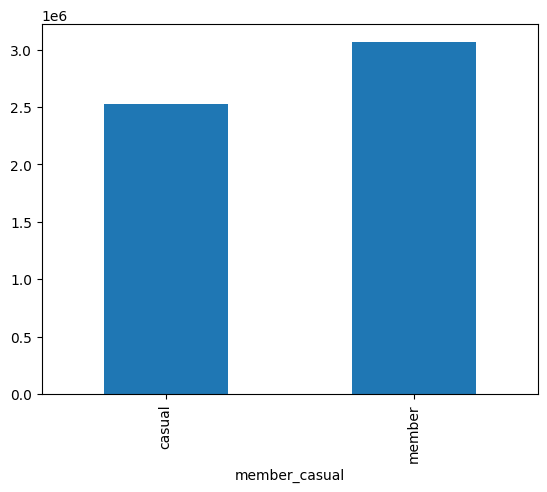

In [25]:
all_data.groupby('member_casual').size().plot(kind='bar')

### calculating number of rides on days of week

In [27]:
all_data.groupby('ride_weekday').size()

ride_weekday
0    857285
1    702588
2    739905
3    756142
4    737588
5    810508
6    991047
dtype: int64

<AxesSubplot: xlabel='ride_weekday'>

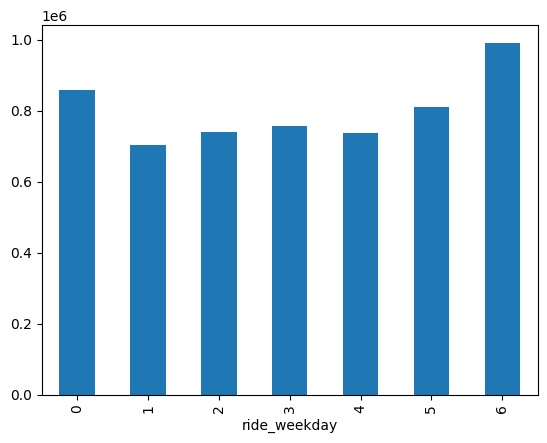

In [24]:
all_data.groupby('ride_weekday').size().plot(kind='bar')

### calculating number of rides on weekdays by both type of members

In [28]:
all_data.groupby(['member_casual', 'ride_weekday']).size()

member_casual  ride_weekday
casual         0               481143
               1               286376
               2               274392
               3               278950
               4               286064
               5               364080
               6               558000
member         0               376142
               1               416212
               2               465513
               3               477192
               4               451524
               5               446428
               6               433047
dtype: int64

<AxesSubplot: xlabel='member_casual,ride_weekday'>

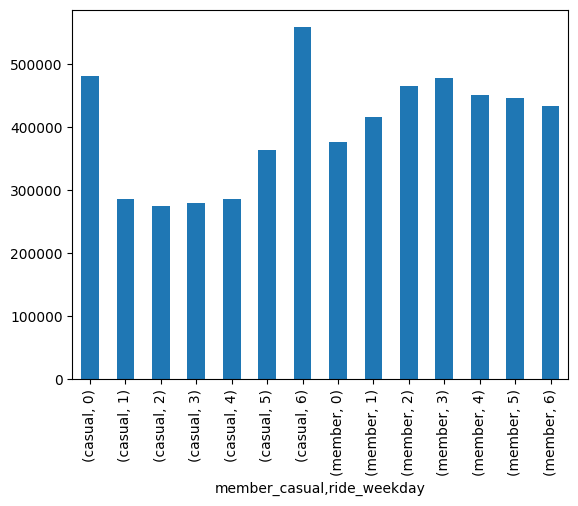

In [29]:
all_data.groupby(['member_casual', 'ride_weekday']).size().plot(kind='bar')

### finding average ride length ( in minutes) by both type of members

In [38]:
all_data.groupby('member_casual').mean()['ride_in_min']

member_casual
casual    31.511207
member    13.143513
Name: ride_in_min, dtype: float64

In [42]:
all_data.groupby(['member_casual', 'ride_weekday']).mean()['ride_in_min']

member_casual  ride_weekday
casual         0               37.071297
               1               31.385556
               2               27.482186
               3               27.166890
               4               27.212568
               5               29.858663
               6               34.216419
member         0               15.164874
               1               12.757724
               2               12.297906
               3               12.329668
               4               12.286835
               5               12.835447
               6               14.775191
Name: ride_in_min, dtype: float64